In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
torch.manual_seed(42)

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [4]:
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 15.3MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 233kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 4.28MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 16.5MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [5]:
test_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

In [6]:
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [7]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.25)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

In [9]:
model = FashionCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    train_losses = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')

        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

    return train_losses

In [11]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
    return accuracy


In [12]:
def show_sample_images(dataloader):
    examples = iter(dataloader)
    images, labels = next(examples)

    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i][0], cmap='gray')
        plt.title(classes[labels[i]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()


Displaying sample images from the dataset:


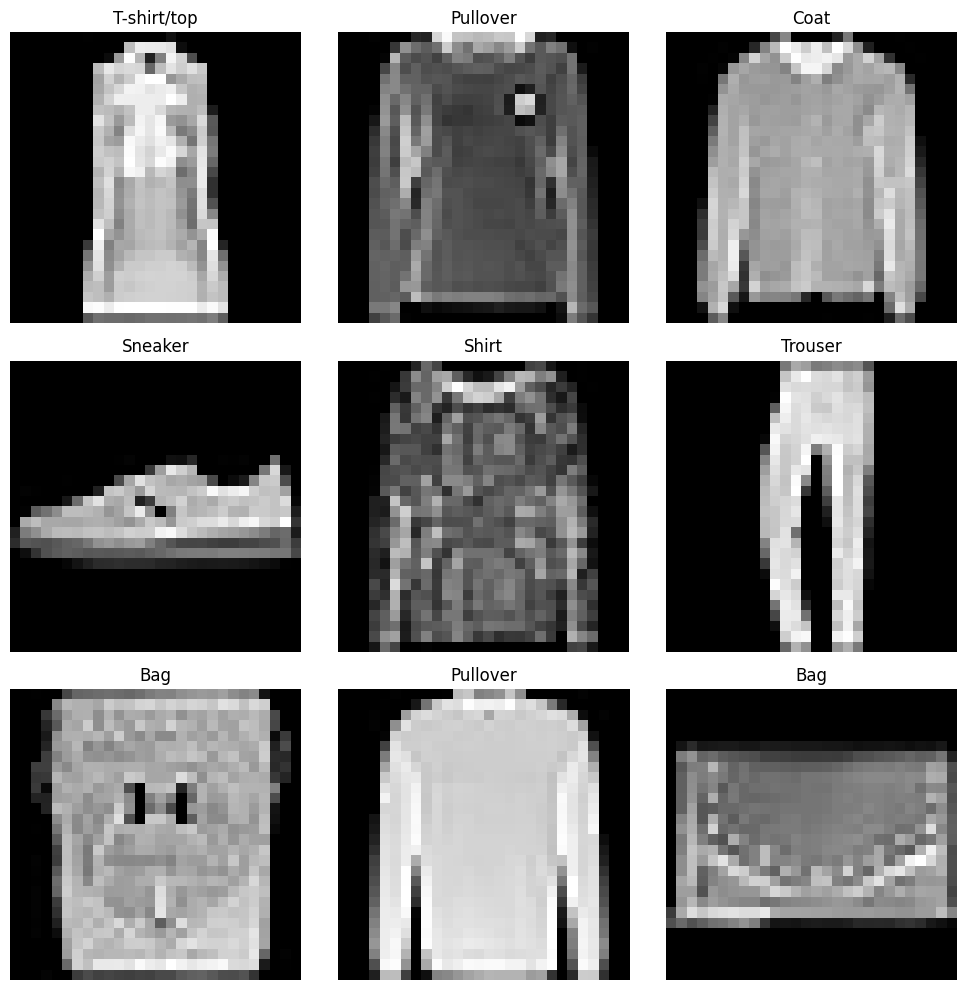


Starting training...
Epoch [1/10], Step [100/938], Loss: 0.4996
Epoch [1/10], Step [200/938], Loss: 0.5342
Epoch [1/10], Step [300/938], Loss: 0.6547
Epoch [1/10], Step [400/938], Loss: 0.4170
Epoch [1/10], Step [500/938], Loss: 0.4234
Epoch [1/10], Step [600/938], Loss: 0.2362
Epoch [1/10], Step [700/938], Loss: 0.3056
Epoch [1/10], Step [800/938], Loss: 0.5210
Epoch [1/10], Step [900/938], Loss: 0.5555
Epoch [1/10], Loss: 0.4952
Epoch [2/10], Step [100/938], Loss: 0.3181
Epoch [2/10], Step [200/938], Loss: 0.3784
Epoch [2/10], Step [300/938], Loss: 0.4427
Epoch [2/10], Step [400/938], Loss: 0.3378
Epoch [2/10], Step [500/938], Loss: 0.2774
Epoch [2/10], Step [600/938], Loss: 0.3052
Epoch [2/10], Step [700/938], Loss: 0.2589
Epoch [2/10], Step [800/938], Loss: 0.1345
Epoch [2/10], Step [900/938], Loss: 0.2375
Epoch [2/10], Loss: 0.3212
Epoch [3/10], Step [100/938], Loss: 0.4841
Epoch [3/10], Step [200/938], Loss: 0.2349
Epoch [3/10], Step [300/938], Loss: 0.2435
Epoch [3/10], Step [4

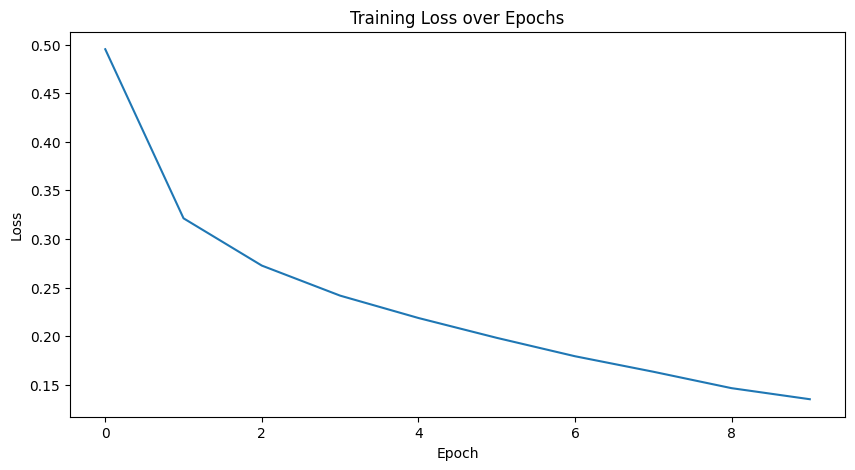


Evaluating model on test set:
Test Accuracy: 91.82%

Model saved to fashion_mnist_model.pth


In [13]:
if __name__ == "__main__":
    # Show some sample images
    print("Displaying sample images from the dataset:")
    show_sample_images(train_loader)

    # Train the model
    print("\nStarting training...")
    train_losses = train_model(model, train_loader, criterion, optimizer)

    # Plot training loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses)
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

    # Evaluate the model
    print("\nEvaluating model on test set:")
    test_accuracy = evaluate_model(model, test_loader)

    # Save the model
    torch.save(model.state_dict(), 'fashion_mnist_model.pth')
    print("\nModel saved to fashion_mnist_model.pth")